# Point Cloud QoE Models

## Joint Communication and Computational Resource Allocation for QoE-driven Point Cloud Video Streaming

In [2]:
def get_distance_weight(g, k, d):
    # p_g,k in equation (5)
    # input: tile k in GOF g, distance d from the viewer to the object
    # output: for simplicity: all tiles have the same distance as d.
    return 1/d


0.3333333333333333


In [ ]:
def get_quality_weight(n, N):
    # QT_g,k in equation (5)
    # input: tile k in GOF g
    # output: the ratio of # of points in the tile k (n) to the total # of points in FOV (N)
    return n/N

In [ ]:
def get_quality_contribution(g, k, d, r):
    # output: quality contribution of tile k in GOF g with quality r at distance d
    distance_weight = get_distance_weight(g, k, d)
    quality_weight = get_quality_weight(n, N)

    return distance_weight * r * quality_weight


In [ ]:
def get_qoe_score (M, R, G, d):
    sum_1 = 0
    sum_2 = 0
    for g in range(G):
        for k in range(M):
            r = 1
            sum_1 += get_quality_contribution(g, k, d, r)
            sum_2 += get_quality_contribution(g, k, d, r) * R/r

    return sum_1/sum_2
    

## Objective metrics for PC compression

In [5]:
import re

In [28]:
def calculate_avg_psnr(file):
    psnr_y = []
    psnr_cb = []
    psnr_cr = []

    with open(file) as f:
        lines = f.readlines()

        for line in lines:
            value = line.split(":")
            if len(value) > 1:
                if "c[0],PSNRF" in line:
                    psnr_y.append(float(value[1]))
                    continue

                if "c[1],PSNRF" in line:
                    psnr_cb.append(float(value[1]))
                    continue

                if "c[2],PSNRF" in line:
                    psnr_cr.append(float(value[1]))
                    continue
    
    psnr_avg = 0
    for y, cb, cr in zip(psnr_y, psnr_cb, psnr_cr):
        psnr_avg += (4*y +cb + cr)/6

    # print("PSNR: ", psnr_avg/len(psnr_y))
    return psnr_avg/len(psnr_y)



In [29]:
file = "/Users/minhkstn/Documents/SPIRIT/pc_metrics/mpeg-pcc-dmetric/longdress_r1.txt"
calculate_avg_psnr(file)

29.12867409438891

In [31]:
file = "/Users/minhkstn/Documents/SPIRIT/pc_metrics/mpeg-pcc-dmetric/longdress_r3.txt"
calculate_avg_psnr(file)

33.244228662166634

In [32]:
file = "/Users/minhkstn/Documents/SPIRIT/pc_metrics/mpeg-pcc-dmetric/longdress_r5.txt"
calculate_avg_psnr(file)

37.86365088561109

In [33]:
file = "/Users/minhkstn/Documents/SPIRIT/pc_metrics/mpeg-pcc-dmetric/soldier_r1_single.txt"
calculate_avg_psnr(file)

34.10684776905554

In [35]:
file = "/Users/minhkstn/Documents/SPIRIT/pc_metrics/mpeg-pcc-dmetric/soldier_r3_single.txt"
calculate_avg_psnr(file)

38.02213302155559

In [36]:
file = "/Users/minhkstn/Documents/SPIRIT/pc_metrics/mpeg-pcc-dmetric/soldier_r5_single.txt"
calculate_avg_psnr(file)

42.54009212388889

In [37]:
file = "/Users/minhkstn/Documents/SPIRIT/pc_metrics/mpeg-pcc-dmetric/loot_r1_single.txt"
calculate_avg_psnr(file)

36.216229541697885

In [39]:
file = "/Users/minhkstn/Documents/SPIRIT/pc_metrics/mpeg-pcc-dmetric/loot_r3_single.txt"
calculate_avg_psnr(file)

40.26865833155558

In [40]:
file = "/Users/minhkstn/Documents/SPIRIT/pc_metrics/mpeg-pcc-dmetric/loot_r5_single.txt"
calculate_avg_psnr(file)

44.67307994149996

In [41]:
file = "/Users/minhkstn/Documents/SPIRIT/pc_metrics/mpeg-pcc-dmetric/redandblack_r1_single.txt"
calculate_avg_psnr(file)

33.382281832944436

In [42]:
file = "/Users/minhkstn/Documents/SPIRIT/pc_metrics/mpeg-pcc-dmetric/redandblack_r3_single.txt"
calculate_avg_psnr(file)

36.86559818305554

In [43]:
file = "/Users/minhkstn/Documents/SPIRIT/pc_metrics/mpeg-pcc-dmetric/redandblack_r5_single.txt"
calculate_avg_psnr(file)

40.92714999705555

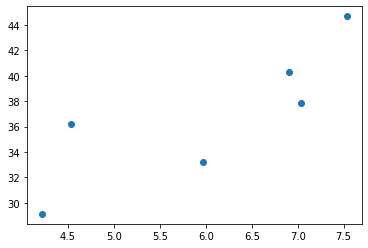

In [46]:
MOS = [4.53125, 6.90625, 7.53125, 4.21875, 5.96875, 7.03125]
PSNR = [36.216229541697885, 40.26865833155558, 44.67307994149996, 29.12867409438891, 33.244228662166634, 37.86365088561109]

import matplotlib.pyplot as plt

plt.scatter(MOS, PSNR)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array([1.25, 2.5, 5])

# RedAndBlack
y_1 = np.array([3.1875, 3.6875, 4.78125])
model = LinearRegression()
model.fit(x.reshape((-1,1)), y_1)
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
# data = [, [5.03125, 5.84375, 6.625], [6.1875, 6.5, 7.21875]]

intercept: 2.640625
slope: [0.42678571]


0.4267857142857146 2.6406249999999996


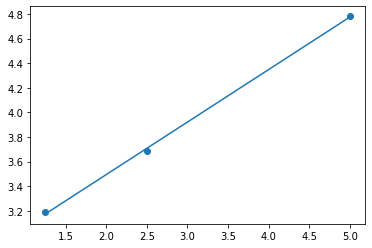

In [9]:
a, b = np.polyfit(x, y_1, 1)
print(a, b)
plt.scatter(x, y_1)
plt.plot(x, a*x+b)

0.40892857142857136 4.640625000000002


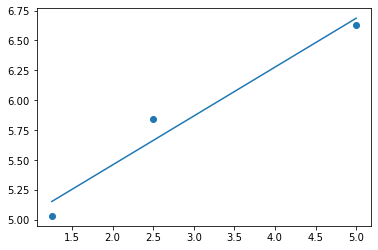

In [11]:
y_2 = np.array([5.03125, 5.84375, 6.625])
a, b = np.polyfit(x, y_2,1)
print(a, b)
plt.scatter(x, y_2)
plt.plot(x, a*x+b)

0.27678571428571463 5.828124999999998


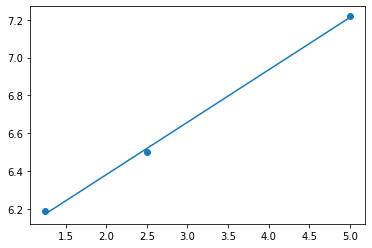

In [13]:
y_3 = np.array([6.1875, 6.5, 7.21875])
a,b = np.polyfit(x, y_3, 1)
print(a,b)
plt.scatter(x, y_3)
plt.plot(x,a*x+b)

0.45892857142857146 1.6406250000000002


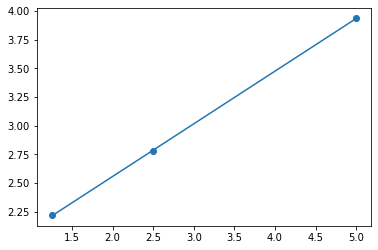

In [14]:
# Soldier
# [, [4.46875, 5.875, 6.34375], ]
y_1 = np.array([2.21875, 2.78125, 3.9375])
a,b = np.polyfit(x,y_1,1)
print(a,b)
plt.scatter(x,y_1)
plt.plot(x,a*x+b)

0.4553571428571427 4.234375000000002


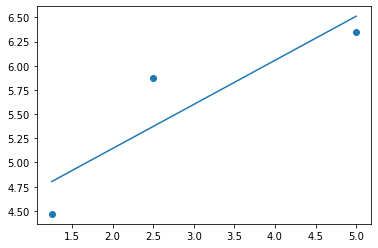

In [15]:
y_1 = np.array([4.46875, 5.875, 6.34375])
a,b = np.polyfit(x,y_1,1)
print(a,b)
plt.scatter(x,y_1)
plt.plot(x,a*x+b)

0.5267857142857145 5.078124999999998


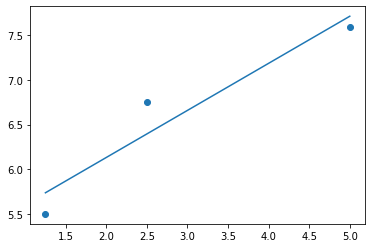

In [16]:
y_1 = np.array([5.5, 6.75, 7.59375])
a,b = np.polyfit(x,y_1,1)
print(a,b)
plt.scatter(x,y_1)
plt.plot(x,a*x+b)